In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir(r'C:\Post Graduate Course in Data Analytics\KAGGLE DATASETS & SCRIPTS\ADCLICK PREDICTION')

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df.sample(n=10)

,User ID,Gender,Age,EstimatedSalary,Purchased
361,15778830,Female,53,34000,1
380,15683758,Male,42,64000,0
224,15575002,Female,35,60000,0
320,15774872,Female,52,138000,1
149,15767871,Male,20,74000,0
18,15704583,Male,46,28000,1
278,15613014,Female,52,38000,1
179,15673367,Female,31,34000,0
339,15665760,Male,39,122000,1
114,15739160,Male,42,80000,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
df.describe(include='all')

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


C:\Users\soume\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

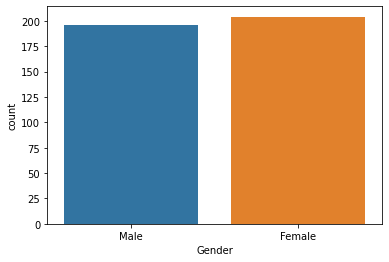

In [4]:
sns.countplot(df.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

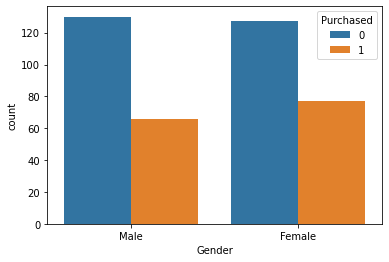

In [17]:
sns.countplot(x='Gender',hue='Purchased',data=df)

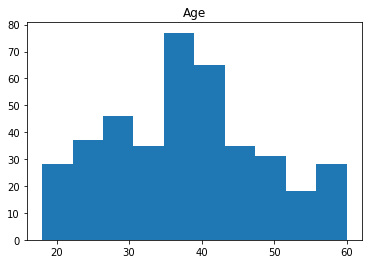

In [6]:
plt.hist(df.Age)
plt.title('Age')
plt.show()

<AxesSubplot:>

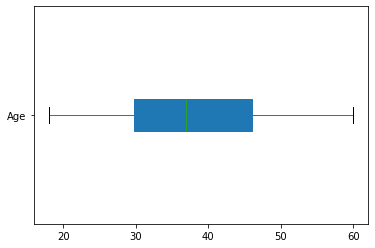

In [7]:
df.Age.plot.box(patch_artist=True,vert=False)

In [23]:
df.groupby('Purchased')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Purchased,,,,,,,,
0,257.0,32.793774,7.985844,18.0,26.0,34.0,38.0,59.0
1,143.0,46.391608,8.612172,27.0,39.5,47.0,53.0,60.0


Text(0.5, 1.0, 'Estimated Salary')

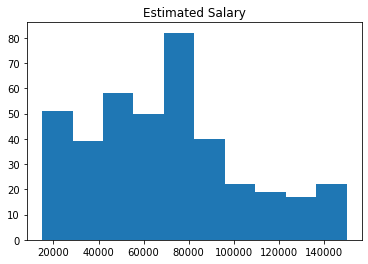

In [21]:
plt.hist(df.EstimatedSalary)
plt.title('Estimated Salary')

<AxesSubplot:>

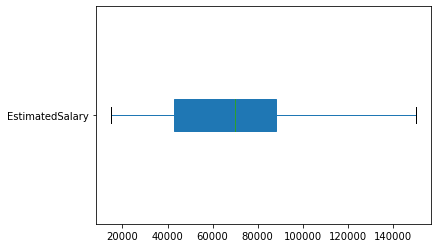

In [22]:
df.EstimatedSalary.plot.box(patch_artist=True,vert=False)

In [24]:
df.groupby('Purchased')['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Purchased,,,,,,,,
0,257.0,60544.747082,24351.570102,15000.0,44000.0,61000.0,77000.0,141000.0
1,143.0,86272.727273,42064.200064,20000.0,41000.0,90000.0,122500.0,150000.0


In [25]:
df['Gender']=df['Gender'].replace(['Male','Female'],[0,1])

In [56]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [72]:
df_num=df[['Age','EstimatedSalary']]
df_num

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [74]:
df_num=sc.fit_transform(df_num)
df_num

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [76]:
df_num=pd.DataFrame(df_num,columns=['Age','EstimatedSalary'])
df_num

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [77]:
df_cat=df[['User ID','Gender','Purchased']]
df_cat

,User ID,Gender,Purchased
0,15624510,0,0
1,15810944,0,0
2,15668575,1,0
3,15603246,1,0
4,15804002,0,0
...,...,...,...
395,15691863,1,1
396,15706071,0,1
397,15654296,1,1
398,15755018,0,0


In [78]:
df1=pd.concat([df_num,df_cat],axis=1)
df1

,Age,EstimatedSalary,User ID,Gender,Purchased
0,-1.781797,-1.490046,15624510,0,0
1,-0.253587,-1.460681,15810944,0,0
2,-1.113206,-0.785290,15668575,1,0
3,-1.017692,-0.374182,15603246,1,0
4,-1.781797,0.183751,15804002,0,0
...,...,...,...,...,...
395,0.797057,-0.844019,15691863,1,1
396,1.274623,-1.372587,15706071,0,1
397,1.179110,-1.460681,15654296,1,1
398,-0.158074,-1.078938,15755018,0,0


In [95]:
from sklearn.utils import resample

In [97]:
df1.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [99]:
zeros=df1[df1.Purchased==0]
len(zeros)

257

In [100]:
ones=df1[df1.Purchased==1]
len(ones)

143

In [101]:
ones_upsampled=resample(ones,replace=True,n_samples=len(zeros),random_state=141)
ones_upsampled

,Age,EstimatedSalary,User ID,Gender,Purchased
366,1.943215,-0.667830,15574372,1,1
247,1.847701,1.534534,15775590,1,1
182,-0.540127,1.387710,15694288,1,1
343,0.892570,-0.550371,15629739,1,1
278,1.370136,-0.932114,15613014,1,1
...,...,...,...,...,...
328,-0.158074,1.417075,15796351,0,1
272,2.134241,-0.814655,15791373,0,1
245,1.274623,2.239291,15722061,1,1
393,2.134241,-0.814655,15635893,0,1


In [102]:
df2=pd.concat([zeros,ones_upsampled])
df2

,Age,EstimatedSalary,User ID,Gender,Purchased
0,-1.781797,-1.490046,15624510,0,0
1,-0.253587,-1.460681,15810944,0,0
2,-1.113206,-0.785290,15668575,1,0
3,-1.017692,-0.374182,15603246,1,0
4,-1.781797,0.183751,15804002,0,0
...,...,...,...,...,...
328,-0.158074,1.417075,15796351,0,1
272,2.134241,-0.814655,15791373,0,1
245,1.274623,2.239291,15722061,1,1
393,2.134241,-0.814655,15635893,0,1


In [119]:
df2.Purchased.value_counts()

0    257
1    257
Name: Purchased, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

In [103]:
x=df2.drop(['User ID','Purchased'],axis=1)
y=df2['Purchased']

In [104]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=47)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lr=LogisticRegression()
lrmodel=lr.fit(xtrain,ytrain)
ypred_lr=lrmodel.predict(xtest)
ypred_lr

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [108]:
confusion_matrix(ytest,ypred_lr)

array([[54,  4],
       [10, 61]], dtype=int64)

In [109]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        58
           1       0.94      0.86      0.90        71

    accuracy                           0.89       129
   macro avg       0.89      0.90      0.89       129
weighted avg       0.90      0.89      0.89       129



In [133]:
acc_lr=accuracy_score(ytest,ypred_lr)*100
acc_lr=round(acc_lr,2)
acc_lr

89.15

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dtc=DecisionTreeClassifier()
dtcmodel=dtc.fit(xtrain,ytrain)
ypred_dtc=dtcmodel.predict(xtest)
ypred_dtc

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0],
      dtype=int64)

In [112]:
confusion_matrix(ytest,ypred_dtc)

array([[53,  5],
       [ 3, 68]], dtype=int64)

In [113]:
print(classification_report(ytest,ypred_dtc))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.93      0.96      0.94        71

    accuracy                           0.94       129
   macro avg       0.94      0.94      0.94       129
weighted avg       0.94      0.94      0.94       129



In [134]:
acc_dtc=accuracy_score(ytest,ypred_dtc)*100
acc_dtc=round(acc_dtc,2)
acc_dtc

93.8

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rfc=RandomForestClassifier(n_estimators=100)
rfcmodel=rfc.fit(xtrain,ytrain)
ypred_rfc=rfcmodel.predict(xtest)
ypred_rfc

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [116]:
confusion_matrix(ytest,ypred_rfc)

array([[54,  4],
       [ 2, 69]], dtype=int64)

In [117]:
print(classification_report(ytest,ypred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.95      0.97      0.96        71

    accuracy                           0.95       129
   macro avg       0.95      0.95      0.95       129
weighted avg       0.95      0.95      0.95       129



In [135]:
acc_rfc=accuracy_score(ytest,ypred_rfc)*100
acc_rfc=round(acc_rfc,2)
acc_rfc

95.35

In [120]:
from sklearn.svm import SVC

In [121]:
svc=SVC(kernel='linear',C=1,gamma='auto',probability=True)
svcmodel=svc.fit(xtrain,ytrain)
ypred_svc=svcmodel.predict(xtest)
ypred_svc

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [122]:
confusion_matrix(ytest,ypred_svc)

array([[52,  6],
       [ 6, 65]], dtype=int64)

In [124]:
print(classification_report(ytest,ypred_svc))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        58
           1       0.92      0.92      0.92        71

    accuracy                           0.91       129
   macro avg       0.91      0.91      0.91       129
weighted avg       0.91      0.91      0.91       129



In [136]:
acc_svc=accuracy_score(ytest,ypred_svc)*100
acc_svc=round(acc_svc,2)
acc_svc

90.7

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
nb=GaussianNB()
nbmodel=nb.fit(xtrain,ytrain)
ypred_nb=nbmodel.predict(xtest)
ypred_nb

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [127]:
confusion_matrix(ytest,ypred_nb)

array([[54,  4],
       [ 3, 68]], dtype=int64)

In [128]:
print(classification_report(ytest,ypred_nb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.94      0.96      0.95        71

    accuracy                           0.95       129
   macro avg       0.95      0.94      0.95       129
weighted avg       0.95      0.95      0.95       129



In [137]:
acc_nb=accuracy_score(ytest,ypred_nb)*100
acc_nb=round(acc_nb,2)
acc_nb

94.57

In [129]:
from xgboost import XGBClassifier

In [130]:
xgb=XGBClassifier(n_estimators=100,learning_rate=0.1)
xgbmodel=xgb.fit(xtrain,ytrain)
ypred_xgb=xgbmodel.predict(xtest)
ypred_xgb

C:\Users\soume\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [131]:
confusion_matrix(ytest,ypred_xgb)

array([[55,  3],
       [ 4, 67]], dtype=int64)

In [132]:
print(classification_report(ytest,ypred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.96      0.94      0.95        71

    accuracy                           0.95       129
   macro avg       0.94      0.95      0.95       129
weighted avg       0.95      0.95      0.95       129



In [138]:
acc_xgb=accuracy_score(ytest,ypred_xgb)*100
acc_xgb=round(acc_xgb,2)
acc_xgb

94.57

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn=KNeighborsClassifier(n_neighbors=3)
knnmodel=knn.fit(xtrain,ytrain)
ypred_knn=knnmodel.predict(xtest)
ypred_knn

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [144]:
confusion_matrix(ytest,ypred_knn)

array([[53,  5],
       [ 1, 70]], dtype=int64)

In [145]:
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        58
           1       0.93      0.99      0.96        71

    accuracy                           0.95       129
   macro avg       0.96      0.95      0.95       129
weighted avg       0.95      0.95      0.95       129



In [146]:
acc_knn=accuracy_score(ytest,ypred_knn)*100
acc_knn=round(acc_knn,2)
acc_knn

95.35

In [147]:
comparison_df=pd.DataFrame({'Classification Models':['Logistic Regression Model','Decision Tree Classifier Model',
                                                    'Random Forest Classifier Model','Support Vector Classifier Model',
                                                    'Naive Bayes Classifier Model','XGBoost Classifier Model',
                                                    'K-Nearest Neighbors Classifier Model'],
                           'Accuracy Scores':[acc_lr,acc_dtc,acc_rfc,acc_svc,acc_nb,acc_xgb,acc_knn]})
comparison_df

,Classification Models,Accuracy Scores
0,Logistic Regression Model,89.15
1,Decision Tree Classifier Model,93.80
2,Random Forest Classifier Model,95.35
3,Support Vector Classifier Model,90.70
4,Naive Bayes Classifier Model,94.57
5,XGBoost Classifier Model,94.57
6,K-Nearest Neighbors Classifier Model,95.35


In [149]:
max(comparison_df['Accuracy Scores'])

95.35

From the above comparison, we can either deploy the Random Forest Classifier Model or the K-Nearest Neighbors Classifier Model as they are giving the best accuracies for the given project.